# *Thermal Transport in a Cylinder*

In this simulation, we solve the diffusion equation in a 3D cylinder,

$$
\begin{align}
  u'   &= \nabla^2 u + f     \quad\text{in a short cylinder}, \\
  u    &= u_D  \hphantom{u+f}\quad\text{on the boundary}, \\
  u    &= u_0  \hphantom{u+f}\quad\;\text{at $t = 0$}.
\end{align}
$$
We apply the Dirichlet boundary condition
$$
  u_D = 0,
$$
initial condition
$$
  u_0 = 0,
$$
and a source term along the central axis,
$$
  f = A \exp\bigl( -(r/\rho)^2 - (z/\zeta)^2 \bigr).
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import time as tm
# import os
# import re
# from color import *
# from IPython.display import Image
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
from fenics import *
from mshr import *   # now deprecated (?), transition to alternate mesh generator (?)

In [3]:
# from mplotg import *
# import matplotlib.pyplot as plt

def multiplot_from_generator(g, num_columns, figsize_for_one_row=None):
    # call 'next(g)' to get past the first 'yield'
#     next(g)
    # default to 15-inch rows, with square subplots
    if figsize_for_one_row is None:
        figsize_for_one_row = (15, 15/num_columns)
    try:
        while True:
            # call plt.figure once per row
            plt.figure(figsize=figsize_for_one_row)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col+1)
                next(g)
    except StopIteration:
        pass

In [4]:
# create mesh
lh  = 0.1
rad = 1.0
mesh_density = 40
domain = Cylinder(Point(0, 0, lh), Point(0., 0., -lh), rad, rad)
mesh = generate_mesh(domain, mesh_density)

# and define function space
V = FunctionSpace(mesh, 'P', 1)

In [5]:
mesh

In [6]:
# define time-step parameters
T = 5.0            # final time
num_steps = 100     # number of time steps
dt = T / num_steps # time step size

In [7]:
# define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

In [8]:
# define initial value
u_0 = Constant(0)
u_n = interpolate(u_0, V)

In [9]:
# define source term
A = 2.0     # amplitude
rho =  0.1  # radial decay length
zeta = 0.05 # longitudinal decay length
f = Expression('A * exp( -(pow(x[0], 2) + pow(x[1], 2)) / pow(rho, 2) - pow(x[2] / zeta, 2) )',
               degree=1, A=A, rho=rho, zeta=zeta)

In [10]:
# define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

In [16]:
# time-stepping
nip = 10
u = Function(V)
t = 0
for n in range(num_steps):

    # compute solution
    solve(a == L, u, bc)

#     # plot solution at nip-step intervals
#     if n % nip == 0:
#         yield plot(u)

    # update time and solution
    t += dt
    u_n.assign(u)

In [14]:
def evolve():
#     # define initial condition
#     u_n = interpolate(u_0, V)

    # time-stepping
    nip = 10
    u = Function(V)
    t = 0
    for n in range(num_steps):

        # compute solution
        solve(a == L, u, bc)

        # plot solution at nip-step intervals
        if n % nip == 0:
            yield plot(u)

        # update time and solution
        t += dt
        u_n.assign(u)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/home/vagrant/.pyenv/versions/3.7.2/envs/py3/lib/python3.7/site-packages/dolfin/common/plotting.py:279: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(projection='3d')


NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

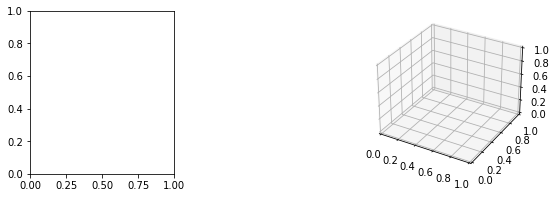

In [15]:
# multiplot_from_generator(evolve(), 5, (15, 3))
multiplot_from_generator(evolve(), 5)

In [ ]:
mesh

In [ ]:
# define initial condition
#u_n = interpolate(u_0, V)

# time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # compute solution
    solve(a == L, u, bc)
    
    # plot solution and save to file
    plot(u)
    plt.savefig('u_plot_' + str(n) + '.png')

    # update current time and solution
    t += dt
    u_n.assign(u)

In [ ]:
xvals = mesh.coordinates()[:,0]
yvals = mesh.coordinates()[:,1]
uvals = u.compute_vertex_values()

In [ ]:
plt.pcolormesh(xvals, yvals, uvals, cmap=plt.cm.viridis)

In [ ]:
plt.pcolormesh?